In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Let's generate synthetic data to represent linear relation between X and y variables
true_slope = 10
true_intercept = 3
input_var = np.arange(0.0, 100.0)
output_var = true_slope*input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

<IPython.core.display.Javascript object>


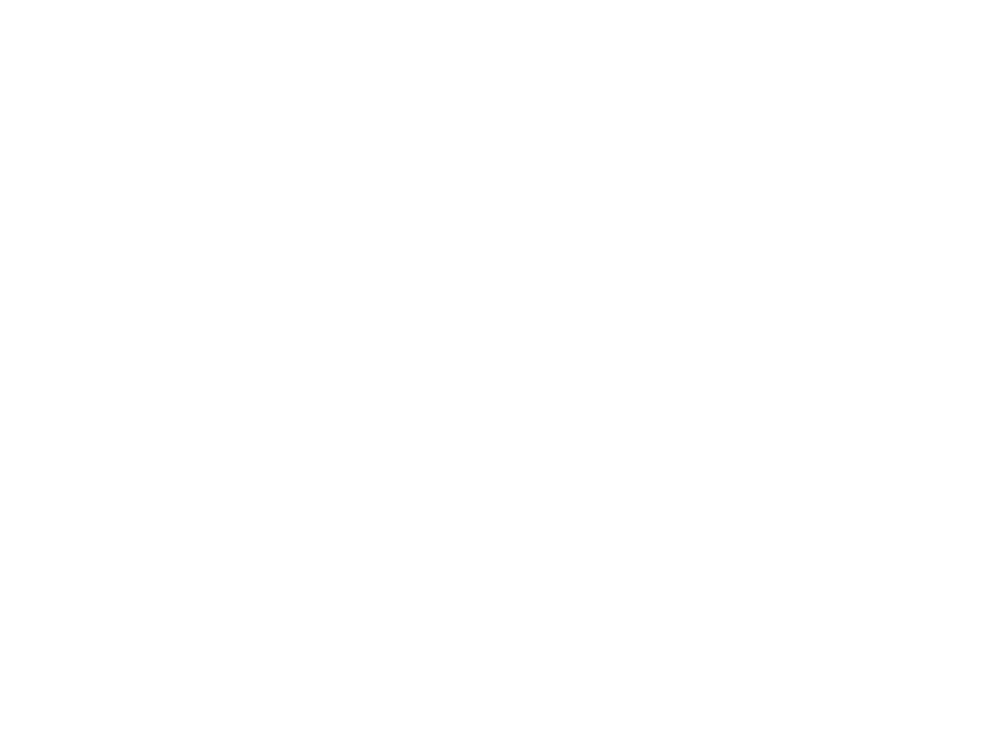

In [3]:
%matplotlib notebook
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Defining cost function

In [4]:
def compute_cost(input_var, output_var, params):
    num_samples = len(input_var)
    cost_sum = 0.0
    for x, y in zip(input_var, output_var):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    cost = cost_sum / (num_samples * 2.0)
    return cost

### Defining function to perform batch gradient descent

In [5]:
def lin_reg_batch_gradient_descent (input_var, output_var, params, alpha, max_iter):
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    while iteration < max_iter:
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store[:, iteration] = params
        
        print('-----------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        for x, y in zip(input_var, output_var):
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_hat)
            params += alpha * gradient/num_samples
            
        iteration +=1
        
    return params, cost, params_store


### Training the model

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_var, output_var, test_size= 0.2, random_state= 42)

params_0 = np.array([20.0, 80.0])
alpha_batch = 1e-3
max_iter = 100
param_hat_batch, cost_batch, params_store_batch = lin_reg_batch_gradient_descent (input_var, output_var, params_0, alpha_batch, max_iter)

-----------------------
iteration: 0
cost: 7280164.27418208
-----------------------
iteration: 1
cost: 20256.65856698175
-----------------------
iteration: 2
cost: 20265.963378921286
-----------------------
iteration: 3
cost: 20542.80350657379
-----------------------
iteration: 4
cost: 20548.201262347437
-----------------------
iteration: 5
cost: 20544.101591729996
-----------------------
iteration: 6
cost: 20539.6824877164
-----------------------
iteration: 7
cost: 20535.25466481418
-----------------------
iteration: 8
cost: 20530.828629077663
-----------------------
iteration: 9
cost: 20526.404734753087
-----------------------
iteration: 10
cost: 20521.98299280873
-----------------------
iteration: 11
cost: 20517.5634026056
-----------------------
iteration: 12
cost: 20513.145963112678
-----------------------
iteration: 13
cost: 20508.730673286194
-----------------------
iteration: 14
cost: 20504.31753208245
-----------------------
iteration: 15
cost: 20499.906538458188
-------------

### Defining function to perform Stochastic gradient descent

In [7]:
def lin_reg_stoch_gradient_descent (input_var, output_var, params, alpha):
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    iteration = 0
    for x, y in zip(input_var, output_var):
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store_batch[:, iteration] = params
        
        print('-----------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        iteration += 1
        
    return params, cost, params_store


In [8]:
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store = lin_reg_stoch_gradient_descent (input_var, output_var, params_0, alpha)

-----------------------
iteration: 0
cost: 7280164.27418208
-----------------------
iteration: 1
cost: 7280177.277253832
-----------------------
iteration: 2
cost: 7280293.938636128
-----------------------
iteration: 3
cost: 7279619.848920469
-----------------------
iteration: 4
cost: 7281302.215115522
-----------------------
iteration: 5
cost: 7279353.444518905
-----------------------
iteration: 6
cost: 7280782.434588053
-----------------------
iteration: 7
cost: 7278668.792773929
-----------------------
iteration: 8
cost: 7277948.556874905
-----------------------
iteration: 9
cost: 7274133.64825725
-----------------------
iteration: 10
cost: 7261555.793064748
-----------------------
iteration: 11
cost: 7256268.72556383
-----------------------
iteration: 12
cost: 7237635.380364002
-----------------------
iteration: 13
cost: 7224452.018156779
-----------------------
iteration: 14
cost: 7211494.91808372
-----------------------
iteration: 15
cost: 7183993.616813723
----------------------

<IPython.core.display.Javascript object>


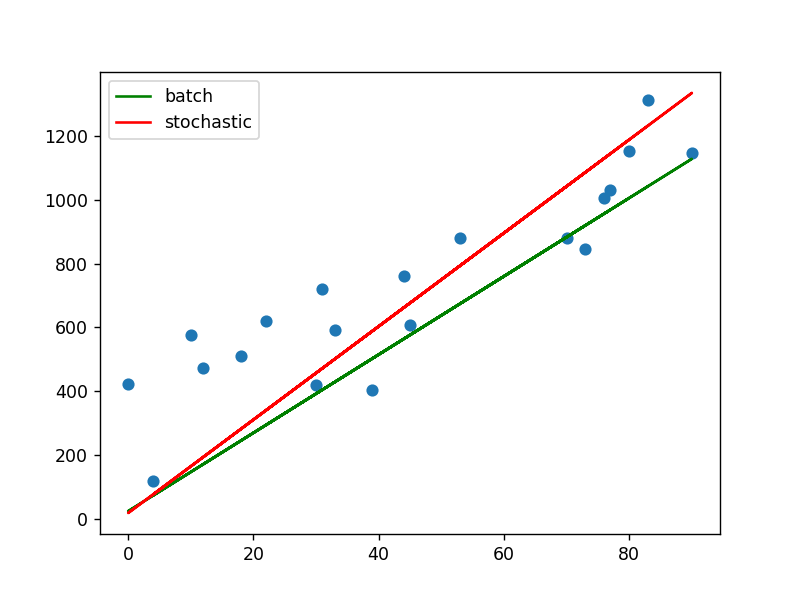

Batch  T0, T1: 24.622114419823994, 12.257773712974094
Stochastic  T0, T1: 18.709030079553216, 14.615892709220859
Batch RMSE 216.73691667085447
Batch RMSE 216.73691667085447


In [11]:
### Let's visualize the results
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, param_hat_batch[0] + param_hat_batch[1] * X_test, 'g', label = 'batch')
plt.plot(X_test, params_hat[0] + params_hat[1] * X_test, '-r', label = 'stochastic')
plt.legend()
plt.show()
print(f'Batch  T0, T1: {param_hat_batch[0]}, {param_hat_batch[1]}')
print(f'Stochastic  T0, T1: {params_hat[0]}, {params_hat[1]}')
RMSE_Batch = np.sqrt(np.mean(np.square(param_hat_batch[0] + param_hat_batch[1] * X_test - y_test)))
RMSE_Stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1] * X_test - y_test)))
print(f'Batch RMSE {RMSE_Batch}')
print(f'Batch RMSE {RMSE_Batch}')

<IPython.core.display.Javascript object>


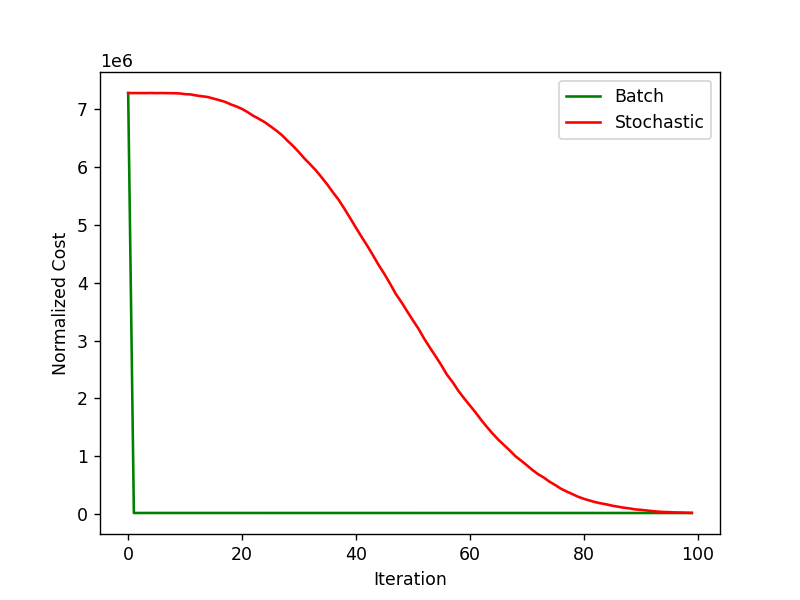

 Min cost with BGD: 20136.94428634116
 Min cost with SGD: 22209.090069876635


In [12]:
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'g', label= 'Batch')
plt.plot(np.arange(len(cost)), cost, '-r', label= 'Stochastic')
plt.xlabel('Iteration')
plt.ylabel('Normalized Cost')
plt.legend()
plt.show()
print(f' Min cost with BGD: {np.min(cost_batch)}')
print(f' Min cost with SGD: {np.min(cost)}')